In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
"""
The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration": 
represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, 
e.g. moving from one page to another. 

- "Bounce Rate", "Exit Rate" and "Page Value":
features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 

- "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to 
the analytics server during that session. 

- "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 

- "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

- "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to 
be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and 
its maximum value of 1 on February 8. 

- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, 
and month of the year.
"""
data = pd.read_csv("./online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
data.shape

(12330, 18)

In [9]:
data.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [10]:
"""convert month to numeric value"""
month_dict={"Jan":1, "Feb":2, "Mar":3,"Apr":4, "May":5, "June":6,"Jul":7, "Aug":8, "Sep":9,"Oct":10, "Nov":11, "Dec":12}
data['Month'] = data['Month'].map(lambda x: month_dict[x])

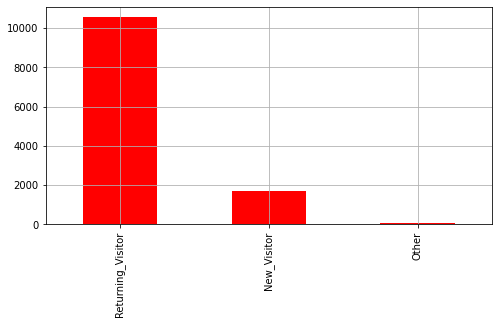

In [11]:
"""convert visitor type to numeric value """
plt.figure(figsize=(8,4))
data['VisitorType'].value_counts().plot(kind ="bar",color='red')
plt.grid()
plt.show()

In [12]:
visitor_type={"Returning_Visitor":1, "New_Visitor":2, "Other":3}
data['VisitorType'] = data['VisitorType'].map(lambda x: visitor_type[x])

In [13]:
"""convert bool value to numeric value"""
data['Weekend']=data['Weekend'].map(lambda x: 1 if(x) else 0)
data['Revenue'] = data['Revenue'].map(lambda x: 1 if(x) else 0)

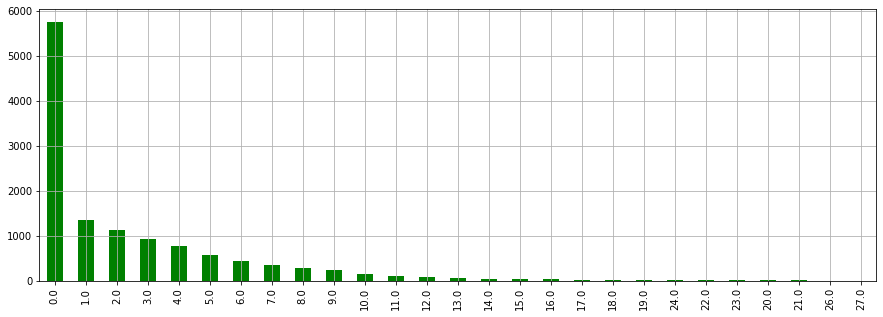

In [14]:
"""fill up NaN based on the value frequency or mean value"""
plt.figure(figsize=(15,5))
data['Administrative'].value_counts().plot(kind="bar", color='g')
plt.grid()
plt.show()

In [15]:
data['Administrative']=data['Administrative'].fillna(data['Administrative'].mode()[0])

In [16]:
data['Administrative_Duration']=data['Administrative_Duration'].fillna(data['Administrative_Duration'].mean())

In [17]:
data['Informational']=data['Informational'].fillna(data['Informational'].mode()[0])

In [18]:
data['Informational_Duration']=data['Informational_Duration'].fillna(data['Informational_Duration'].mean())

In [19]:
data['ProductRelated']=data['ProductRelated'].fillna(data['ProductRelated'].mode()[0])

In [20]:
data['ProductRelated_Duration'] = data['ProductRelated_Duration'].fillna(data['ProductRelated_Duration'].mean())

In [21]:
data['BounceRates'] = data['BounceRates'].fillna(data['BounceRates'].mean())

In [22]:
data['ExitRates']= data['ExitRates'].fillna(data['ExitRates'].mean())

In [23]:
data.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object

In [24]:
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [26]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,1,0


In [27]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.906176,0.503406,34.506387,31.728954,1196.037057,0.022152,0.043003,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,1.151176,0.232603,0.154745
std,3.321784,176.759988,1.270093,140.745501,44.477141,1913.285284,0.048400,0.048500,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.287500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,601.059874,0.003125,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016941,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,3.000000,1.000000,1.000000


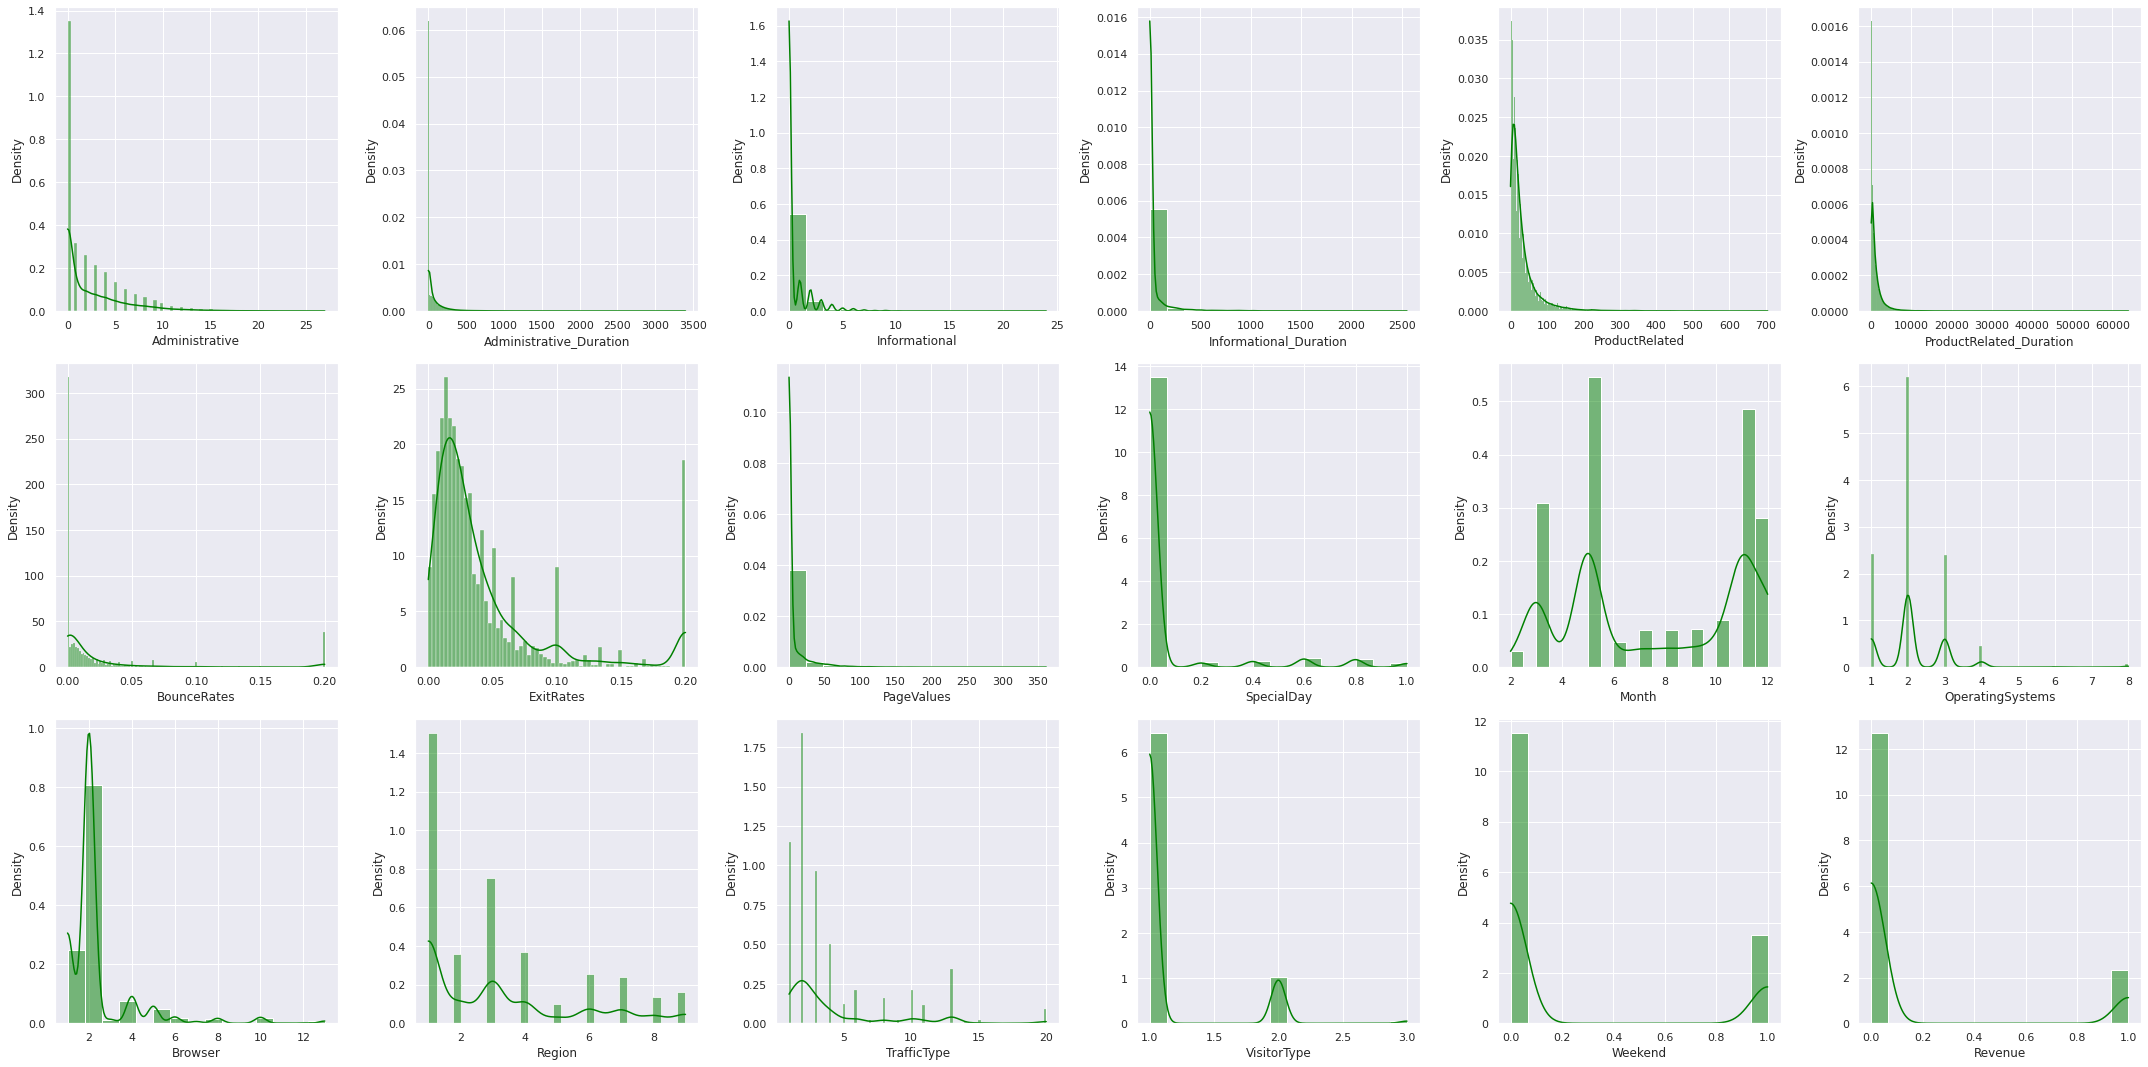

In [165]:
"""plot distribution for each attribute"""
fig=plt.figure(figsize=(30,15))
for index, col_name in enumerate(data.columns.values):
    axi = plt.subplot(3,6,index+1);
    sns.histplot(data[col_name],ax=axi, kde=True, color='green', stat="density")
    
plt.tight_layout()

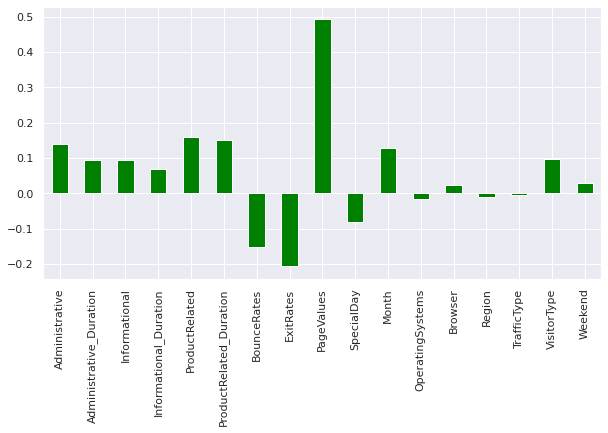

In [168]:
"""plot for correlation between Revenue and all attributes """
plt.figure(figsize=(10,5))
data.corr(method="pearson").iloc[0:-1,-1].plot(kind='bar', color='green')
plt.show()

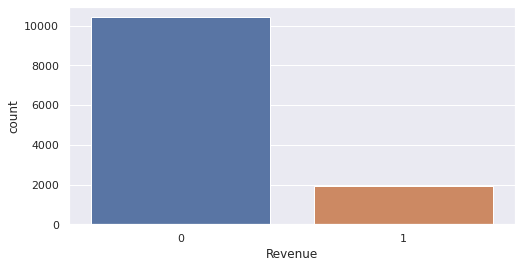

In [169]:
"""revenue count"""
plt.figure(figsize=(8,4))
sns.countplot(x='Revenue',data=data)
plt.show()

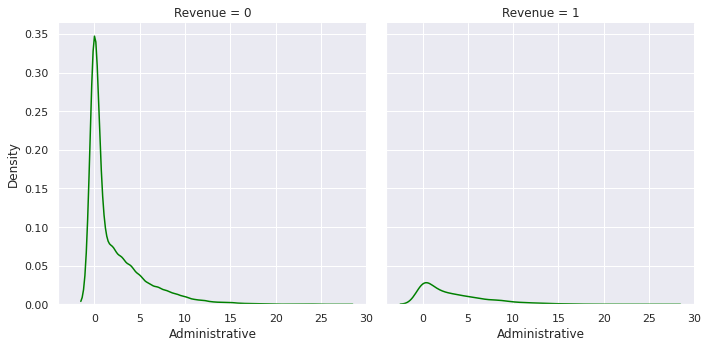

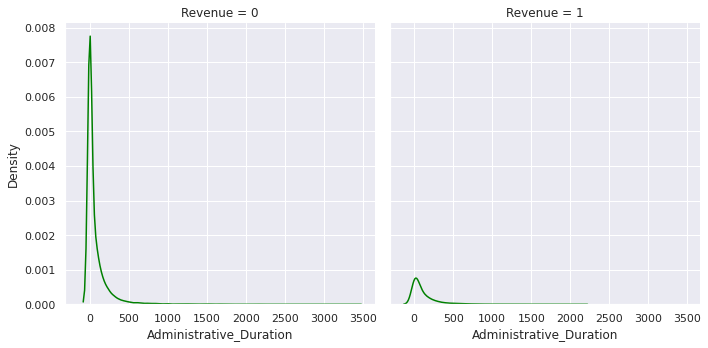

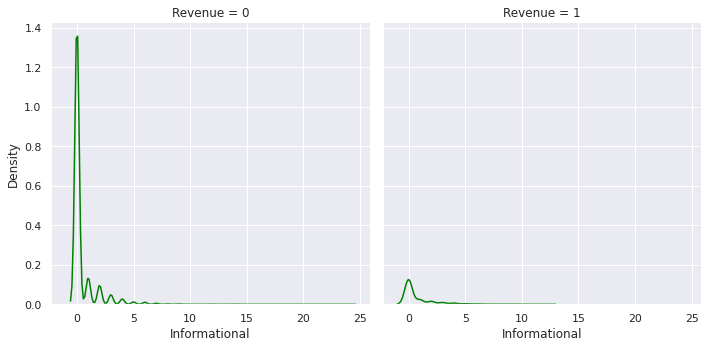

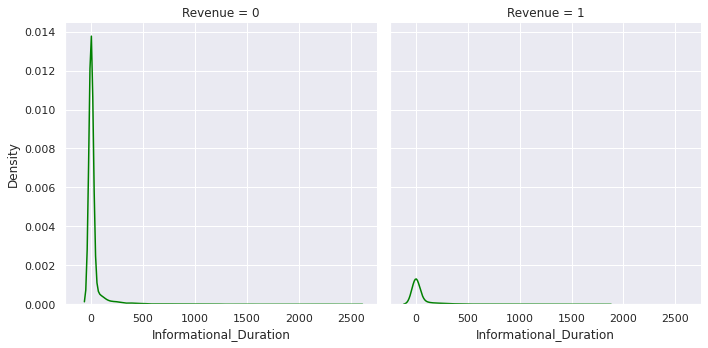

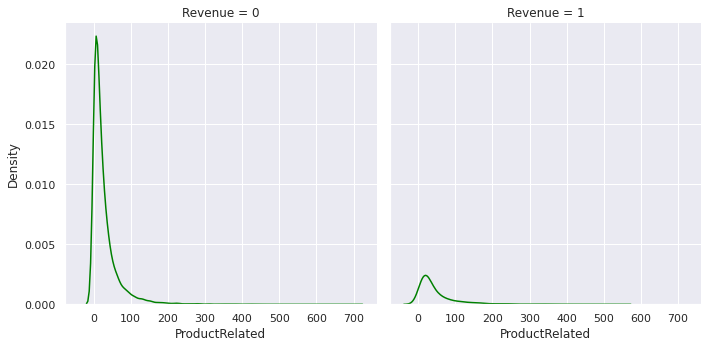

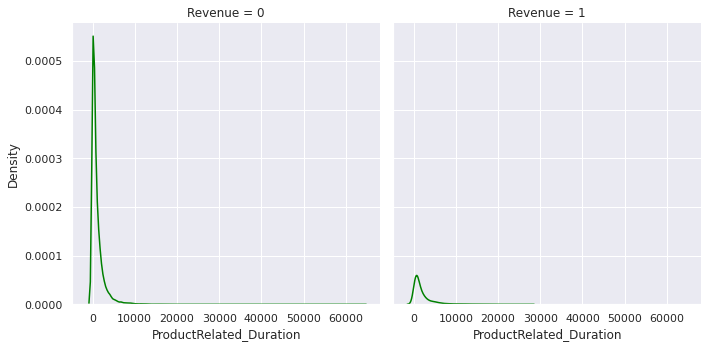

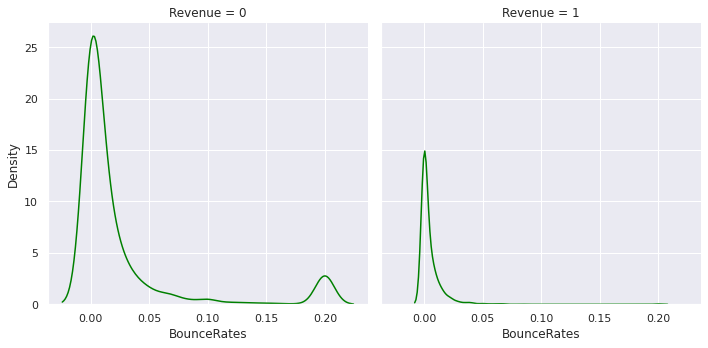

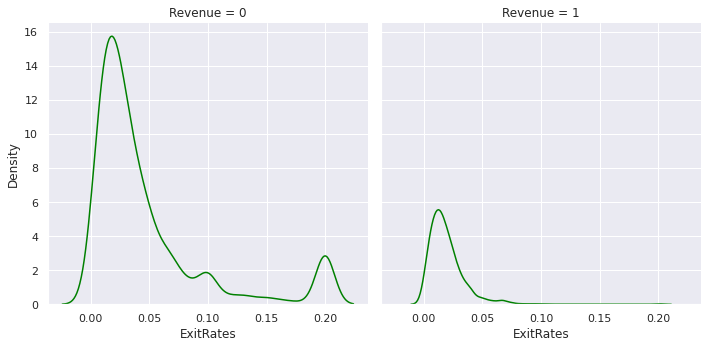

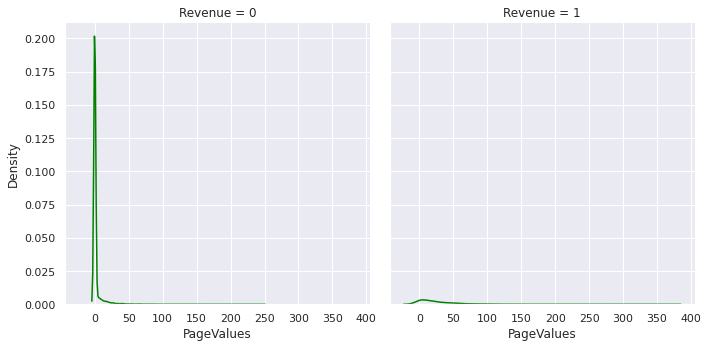

In [188]:
"""distribution of revenue against continuous data attribute"""
for column_name in data.columns.values[0:9]:
    if column_name=='Revenue': continue
    sns.displot(data=data, x=column_name, col="Revenue", kind="kde", color='green')

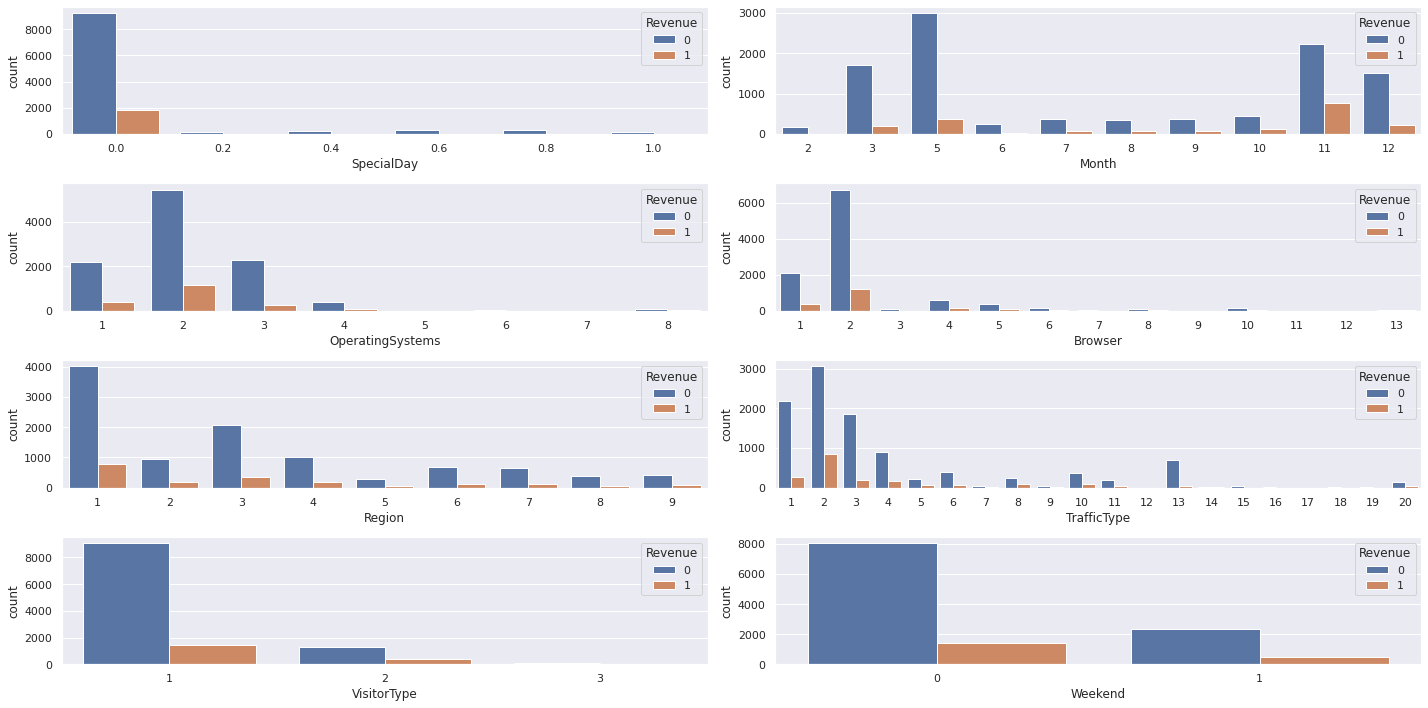

In [194]:
"""count of revenue against categorical data attribute"""
plt.figure(figsize=(20,10))

for index, column_name in enumerate(data.columns.values[9:]):
    if column_name=='Revenue': continue
    ax = plt.subplot(4,2,index+1)
    sns.countplot(data=data, x=column_name, hue='Revenue')

plt.tight_layout()